In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np  # linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import os
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from PIL import Image
#from imutils import paths
import random
import pickle
import cv2
import datetime
from pprint import pprint
import librosa

import keras
from keras.utils import np_utils
from keras.regularizers import *
from keras.initializers import glorot_uniform

import keras.backend as K
K.clear_session()

from keras.models import *
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import *
from keras.callbacks import *

In [3]:
import pandas as pd
file1 = pd.read_csv('/content/drive/MyDrive/archive (1)/1/1.benign.csv')
file1['label'] = 'benign'
file2 = pd.read_csv('/content/drive/MyDrive/archive (1)/1/1.gafgyt.combo.csv')
file2['label'] = 'gafgyt combo'
file0 = pd.concat([file1,file2])
del file1,file2
#file 1
file3 = pd.read_csv('/content/drive/MyDrive/archive (1)/1/1.gafgyt.junk.csv')
file3['label'] = 'gafgyt junk'
file0 = pd.concat([file0,file3])
del file3
file4 = pd.read_csv('/content/drive/MyDrive/archive (1)/1/1.gafgyt.scan.csv')
file4['label'] = 'gafgyt scan'
file0 = pd.concat([file0,file4])
del file4
file5 = pd.read_csv('/content/drive/MyDrive/archive (1)/1/1.gafgyt.tcp.csv')
file5['label'] = 'gafgyt tcp'
file0 = pd.concat([file0,file5])
del file5
file6 = pd.read_csv('/content/drive/MyDrive/archive (1)/1/1.gafgyt.udp.csv')
file6['label'] = 'gafgyt udp'
file0 = pd.concat([file0,file6])
del file6
file7 = pd.read_csv('/content/drive/MyDrive/archive (1)/1/1.mirai.ack.csv')
file7['label'] = 'mirai ack'
file0 = pd.concat([file0,file7])
del file7
file8 = pd.read_csv('/content/drive/MyDrive/archive (1)/1/1.mirai.scan.csv')
file8['label'] = 'mirai scan'
file0 = pd.concat([file0,file8])
del file8
file9 = pd.read_csv('/content/drive/MyDrive/archive (1)/1/1.mirai.syn.csv')
file9['label'] = 'mirai syn'
file0 = pd.concat([file0,file9])
del file9
file10 = pd.read_csv('/content/drive/MyDrive/archive (1)/1/1.mirai.udp.csv')
file10['label'] = 'mirai udp'
file0 = pd.concat([file0,file10])
del file10
file11 = pd.read_csv('/content/drive/MyDrive/archive (1)/1/1.mirai.udpplain.csv')
file11['label'] = 'mirai udpplain'
file0 = pd.concat([file0,file11])
del file11

In [4]:
# file 2
file1 = pd.read_csv('/content/drive/MyDrive/archive (1)/2/2.benign.csv')
file1['label'] = 'benign'
file0 = pd.concat([file0,file1])
del file1
file2 = pd.read_csv('/content/drive/MyDrive/archive (1)/2/2.gafgyt.combo.csv')
file2['label'] = 'gafgyt combo'
file0 = pd.concat([file0,file2])
del file2
file3 = pd.read_csv('/content/drive/MyDrive/archive (1)/2/2.gafgyt.junk.csv')
file3['label'] = 'gafgyt junk'
file0 = pd.concat([file0,file3])
del file3
file4 = pd.read_csv('/content/drive/MyDrive/archive (1)/2/2.gafgyt.scan.csv')
file4['label'] = 'gafgyt scan'
file0 = pd.concat([file0,file4])
del file4
file5 = pd.read_csv('/content/drive/MyDrive/archive (1)/2/2.gafgyt.tcp.csv')
file5['label'] = 'gafgyt tcp'
file0 = pd.concat([file0,file5])
del file5
file6 = pd.read_csv('/content/drive/MyDrive/archive (1)/2/2.gafgyt.udp.csv')
file6['label'] = 'gafgyt udp'
file0 = pd.concat([file0,file6])
del file6
file7 = pd.read_csv('/content/drive/MyDrive/archive (1)/2/2.mirai.ack.csv')
file7['label'] = 'mirai ack'
file0 = pd.concat([file0,file7])
del file7
file8 = pd.read_csv('/content/drive/MyDrive/archive (1)/2/2.mirai.scan.csv')
file8['label'] = 'mirai scan'
file0 = pd.concat([file0,file8])
del file8
file9 = pd.read_csv('/content/drive/MyDrive/archive (1)/2/2.mirai.syn.csv')
file9['label'] = 'mirai syn'
file0 = pd.concat([file0,file9])
del file9
file10 = pd.read_csv('/content/drive/MyDrive/archive (1)/2/2.mirai.udp.csv')
file10['label'] = 'mirai udp'
file0 = pd.concat([file0,file10])
del file10
file11 = pd.read_csv('/content/drive/MyDrive/archive (1)/2/2.mirai.udpplain.csv')
file11['label'] = 'mirai udpplain'
file0 = pd.concat([file0,file11])
del file11

In [5]:
#file 3
file1 = pd.read_csv('/content/drive/MyDrive/archive (1)/3/3.benign.csv')
file1['label'] = 'benign'
file0 = pd.concat([file0,file1])
del file1
file2 = pd.read_csv('/content/drive/MyDrive/archive (1)/3/3.gafgyt.combo.csv')
file2['label'] = 'gafgyt combo'
file0 = pd.concat([file0,file2])
del file2
file3 = pd.read_csv('/content/drive/MyDrive/archive (1)/3/3.gafgyt.junk.csv')
file3['label'] = 'gafgyt junk'
file0 = pd.concat([file0,file3])
del file3
file4 = pd.read_csv('/content/drive/MyDrive/archive (1)/3/3.gafgyt.scan.csv')
file4['label'] = 'gafgyt scan'
file0 = pd.concat([file0,file4])
del file4
file5 = pd.read_csv('/content/drive/MyDrive/archive (1)/3/3.gafgyt.tcp.csv')
file5['label'] = 'gafgyt tcp'
file0 = pd.concat([file0,file5])
del file5
file6 = pd.read_csv('/content/drive/MyDrive/archive (1)/3/3.gafgyt.udp.csv')
file6['label'] = 'gafgyt udp'
file0 = pd.concat([file0,file6])
del file6

In [6]:
file1 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.benign.csv')
file1['label'] = 'benign'
file0 = pd.concat([file0,file1])
del file1
file2 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.gafgyt.combo.csv')
file2['label'] = 'gafgyt combo'
file0 = pd.concat([file0,file2])
del file2
file3 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.gafgyt.junk.csv')
file3['label'] = 'gafgyt junk'
file0 = pd.concat([file0,file3])
del file3
file4 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.gafgyt.scan.csv')
file4['label'] = 'gafgyt scan'
file0 = pd.concat([file0,file4])
del file4
file5 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.gafgyt.tcp.csv')
file5['label'] = 'gafgyt tcp'
file0 = pd.concat([file0,file5])
del file5
file6 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.gafgyt.udp.csv')
file6['label'] = 'gafgyt udp'
file0 = pd.concat([file0,file6])
del file6
file7 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.mirai.ack.csv')
file7['label'] = 'mirai ack'
file0 = pd.concat([file0,file7])
del file7
file8 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.mirai.scan.csv')
file8['label'] = 'mirai scan'
file0 = pd.concat([file0,file8])
del file8
file9 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.mirai.syn.csv')
file9['label'] = 'mirai syn'
file0 = pd.concat([file0,file9])
del file9
file10 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.mirai.udp.csv')
file10['label'] = 'mirai udp'
file0 = pd.concat([file0,file10])
del file10
file11 = pd.read_csv('/content/drive/MyDrive/archive (1)/4/4.mirai.udpplain.csv')
file11['label'] = 'mirai udpplain'
file0 = pd.concat([file0,file11])
del file11

In [7]:
file1 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.benign.csv')
file1['label'] = 'benign'
file0 = pd.concat([file0,file1])
del file1
file2 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.gafgyt.combo.csv')
file2['label'] = 'gafgyt combo'
file0 = pd.concat([file0,file2])
del file2
file3 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.gafgyt.junk.csv')
file3['label'] = 'gafgyt junk'
file0 = pd.concat([file0,file3])
del file3
file4 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.gafgyt.scan.csv')
file4['label'] = 'gafgyt scan'
file0 = pd.concat([file0,file4])
del file4
file5 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.gafgyt.tcp.csv')
file5['label'] = 'gafgyt tcp'
file0 = pd.concat([file0,file5])
del file5
file6 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.gafgyt.udp.csv')
file6['label'] = 'gafgyt udp'
file0 = pd.concat([file0,file6])
del file6
file7 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.mirai.ack.csv')
file7['label'] = 'mirai ack'
file0 = pd.concat([file0,file7])
del file7
file8 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.mirai.scan.csv')
file8['label'] = 'mirai scan'
file0 = pd.concat([file0,file8])
del file8
file9 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.mirai.syn.csv')
file9['label'] = 'mirai syn'
file0 = pd.concat([file0,file9])
del file9
file10 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.mirai.udp.csv')
file10['label'] = 'mirai udp'
file0 = pd.concat([file0,file10])
del file10
file11 = pd.read_csv('/content/drive/MyDrive/archive (1)/5/5.mirai.udpplain.csv')
file11['label'] = 'mirai udpplain'
file0 = pd.concat([file0,file11])
del file11

In [8]:
file1 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.benign.csv')
file1['label'] = 'benign'
file0 = pd.concat([file0,file1])
del file1
file2 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.gafgyt.combo.csv')
file2['label'] = 'gafgyt combo'
file0 = pd.concat([file0,file2])
del file2
file3 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.gafgyt.junk.csv')
file3['label'] = 'gafgyt junk'
file0 = pd.concat([file0,file3])
del file3
file4 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.gafgyt.scan.csv')
file4['label'] = 'gafgyt scan'
file0 = pd.concat([file0,file4])
del file4
file5 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.gafgyt.tcp.csv')
file5['label'] = 'gafgyt tcp'
file0 = pd.concat([file0,file5])
del file5
file6 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.gafgyt.udp.csv')
file6['label'] = 'gafgyt udp'
file0 = pd.concat([file0,file6])
del file6
file7 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.mirai.ack.csv')
file7['label'] = 'mirai ack'
file0 = pd.concat([file0,file7])
del file7
file8 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.mirai.scan.csv')
file8['label'] = 'mirai scan'
file0 = pd.concat([file0,file8])
del file8
file9 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.mirai.syn.csv')
file9['label'] = 'mirai syn'
file0 = pd.concat([file0,file9])
del file9
file10 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.mirai.udp.csv')
file10['label'] = 'mirai udp'
file0 = pd.concat([file0,file10])
del file10
file11 = pd.read_csv('/content/drive/MyDrive/archive (1)/6/6.mirai.udpplain.csv')
file11['label'] = 'mirai udpplain'
file0 = pd.concat([file0,file11])
del file11

In [9]:
file1 = pd.read_csv('/content/drive/MyDrive/archive (1)/7/7.benign.csv')
file1['label'] = 'benign'
file0 = pd.concat([file0,file1])
del file1
file2 = pd.read_csv('/content/drive/MyDrive/archive (1)/7/7.gafgyt.combo.csv')
file2['label'] = 'gafgyt combo'
file0 = pd.concat([file0,file2])
del file2
file3 = pd.read_csv('/content/drive/MyDrive/archive (1)/7/7.gafgyt.junk.csv')
file3['label'] = 'gafgyt junk'
file0 = pd.concat([file0,file3])
del file3
file4 = pd.read_csv('/content/drive/MyDrive/archive (1)/7/7.gafgyt.scan.csv')
file4['label'] = 'gafgyt scan'
file0 = pd.concat([file0,file4])
del file4
file5 = pd.read_csv('/content/drive/MyDrive/archive (1)/7/7.gafgyt.tcp.csv')
file5['label'] = 'gafgyt tcp'
file0 = pd.concat([file0,file5])
del file5
file6 = pd.read_csv('/content/drive/MyDrive/archive (1)/7/7.gafgyt.udp.csv')
file6['label'] = 'gafgyt udp'
file0 = pd.concat([file0,file6])
del file6

In [10]:
file1 = pd.read_csv('/content/drive/MyDrive/archive (1)/8/8.benign.csv')
file1['label'] = 'benign'
file0 = pd.concat([file0,file1])
del file1
file2 = pd.read_csv('/content/drive/MyDrive/archive (1)/8/8.gafgyt.combo.csv')
file2['label'] = 'gafgyt combo'
file0 = pd.concat([file0,file2])
del file2
file3 = pd.read_csv('/content/drive/MyDrive/archive (1)/8/8.gafgyt.junk.csv')
file3['label'] = 'gafgyt junk'
file0 = pd.concat([file0,file3])
del file3
file4 = pd.read_csv('/content/drive/MyDrive/archive (1)/8/8.gafgyt.scan.csv')
file4['label'] = 'gafgyt scan'
file0 = pd.concat([file0,file4])
del file4
file5 = pd.read_csv('/content/drive/MyDrive/archive (1)/8/8.gafgyt.tcp.csv')
file5['label'] = 'gafgyt tcp'
file0 = pd.concat([file0,file5])
del file5
file6 = pd.read_csv('/content/drive/MyDrive/archive (1)/8/8.gafgyt.udp.csv')
file6['label'] = 'gafgyt udp'
file0 = pd.concat([file0,file6])
del file6
file7 = pd.read_csv('/content/drive/MyDrive/archive (1)/8/8.mirai.ack.csv')
file7['label'] = 'mirai ack'
file0 = pd.concat([file0,file7])
del file7
file8 = pd.read_csv('/content/drive/MyDrive/archive (1)/8/8.mirai.scan.csv')
file8['label'] = 'mirai scan'
file0 = pd.concat([file0,file8])
del file8
file9 = pd.read_csv('/content/drive/MyDrive/archive (1)/8/8.mirai.syn.csv')
file9['label'] = 'mirai syn'
file0 = pd.concat([file0,file9])
del file9
file10 = pd.read_csv('/content/drive/MyDrive/archive (1)/8/8.mirai.udp.csv')
file10['label'] = 'mirai udp'
file0 = pd.concat([file0,file10])
del file10
file11 = pd.read_csv('/content/drive/MyDrive/archive (1)/8/8.mirai.udpplain.csv')
file11['label'] = 'mirai udpplain'
file0 = pd.concat([file0,file11])
del file11

In [11]:
file1 = pd.read_csv('/content/drive/MyDrive/archive (1)/9/9.benign.csv')
file1['label'] = 'benign'
file0 = pd.concat([file0,file1])
del file1
file2 = pd.read_csv('/content/drive/MyDrive/archive (1)/9/9.gafgyt.combo.csv')
file2['label'] = 'gafgyt combo'
file0 = pd.concat([file0,file2])
del file2
file3 = pd.read_csv('/content/drive/MyDrive/archive (1)/9/9.gafgyt.junk.csv')
file3['label'] = 'gafgyt junk'
file0 = pd.concat([file0,file3])
del file3
file4 = pd.read_csv('/content/drive/MyDrive/archive (1)/9/9.gafgyt.scan.csv')
file4['label'] = 'gafgyt scan'
file0 = pd.concat([file0,file4])
del file4
file5 = pd.read_csv('/content/drive/MyDrive/archive (1)/9/9.gafgyt.tcp.csv')
file5['label'] = 'gafgyt tcp'
file0 = pd.concat([file0,file5])
del file5
file6 = pd.read_csv('/content/drive/MyDrive/archive (1)/9/9.gafgyt.udp.csv')
file6['label'] = 'gafgyt udp'
file0 = pd.concat([file0,file6])
del file6
file7 = pd.read_csv('/content/drive/MyDrive/archive (1)/9/9.mirai.ack.csv')
file7['label'] = 'mirai ack'
file0 = pd.concat([file0,file7])
del file7
file8 = pd.read_csv('/content/drive/MyDrive/archive (1)/9/9.mirai.scan.csv')
file8['label'] = 'mirai scan'
file0 = pd.concat([file0,file8])
del file8
file9 = pd.read_csv('/content/drive/MyDrive/archive (1)/9/9.mirai.syn.csv')
file9['label'] = 'mirai syn'
file0 = pd.concat([file0,file9])
del file9
file10 = pd.read_csv('/content/drive/MyDrive/archive (1)/9/9.mirai.udp.csv')
file10['label'] = 'mirai udp'
file0 = pd.concat([file0,file10])
del file10
file11 = pd.read_csv('/content/drive/MyDrive/archive (1)/9/9.mirai.udpplain.csv')
file11['label'] = 'mirai udpplain'
file0 = pd.concat([file0,file11])
del file11

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
file0.label = le.fit_transform(file0.label)

file0

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84431,139.757744,211.170586,51825.723363,201.468897,261.713352,58958.118864,500.974482,336.812843,60119.002809,5075.565056,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,10
84432,140.233636,210.092595,51617.954822,202.015237,260.714846,58866.683908,501.598174,336.260982,60151.605768,5076.183675,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,10
84433,141.231666,209.029854,51410.850579,203.013535,259.726169,58774.184279,502.596765,335.711314,60183.473607,5077.182249,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,10
84434,142.231199,207.982054,51204.446452,204.013132,258.747182,58680.664952,503.596433,335.163830,60214.614232,5078.181913,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,10


In [13]:
import numpy as np

# assume your DataFrame is named 'df'
file0 = file0.replace([np.inf, -np.inf], np.nan)  # replace infinite values with NaN
#da = da[da.abs() < np.finfo(np.float64).max]  # remove all rows containing values larger than max float

file0 = file0.dropna()

# print the new DataFrame shape to verify the infinite or too large values have been removed
print(file0.shape)

(7062606, 116)


In [14]:
data = file0.iloc[:,:-1]

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(file0.iloc[:,:-1])

In [16]:
X = pd.DataFrame(scaled_features, columns = data.columns)
y = file0.iloc[:,-1]

print(X.shape)
print(y.shape)

(7062606, 115)
(7062606,)


In [17]:
import pandas as pd

def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [18]:
corr_features = correlation(X,0.9)
len(set(corr_features))

85

In [19]:
X = X.drop(corr_features, axis = 1)

In [20]:
X = X.values

In [21]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=100)
Xrus,Yrus = rus.fit_resample(X,y)

In [22]:
labels_full = pd.get_dummies(Yrus,prefix='type')
labels_full.head()

labels = labels_full.values

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xrus,labels, test_size=0.2, random_state=100)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.125, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_validate.shape)
print(y_test.shape)

(1964354, 30)
(1964354, 11)
(561245, 30)
(280622, 11)
(561245, 11)


In [24]:
import numpy as np
X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_validate_cnn = np.reshape(X_validate, (X_validate.shape[0], X_validate.shape[1],1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [40]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the LeNet model
def LeNet(input_shape, num_classes):
    model = Sequential()
    # First convolutional layer
    model.add(Conv1D(filters = 16, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    # Second convolutional layer
    model.add(Conv1D(filters = 16, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    # Third convolutional layer 
    model.add(Conv1D(16, kernel_size=4, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    # Flatten the output from the convolutional layers
    model.add(Flatten())
    # First fully connected layer
    model.add(Dense(128, activation='relu'))
    # Second fully connected layer
    model.add(Dense(64, activation='relu'))
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Define the input shape and number of classes
input_shape =  (X_train.shape[1], 1)
num_classes = labels_full.shape[1]

# Create the LeNet model
model = LeNet(input_shape, num_classes)

modelName = 'CNN'
# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 26, 16)            96        
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 13, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 9, 16)             1296      
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 4, 16)            0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 1, 16)             1040      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 1, 16)           

In [28]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            learning_rate=0.00001)
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

checkpoint = ModelCheckpoint('./'+modelName+'.h5',
                            monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             save_weights_only=True,
                             verbose=1)

In [29]:
epochs = 100
batch_size = 512
history = model.fit(X_train_cnn,y_train, batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_validate_cnn,y_validate),
    callbacks=[learning_rate_reduction, checkpoint] 
)


Epoch 1/100
3837/3837 [==============================] - ETA: 0s - loss: 0.4856 - accuracy: 0.7584
Epoch 1: val_loss improved from inf to 0.37664, saving model to ./CNN.h5
3837/3837 [==============================] - 28s 4ms/step - loss: 0.4856 - accuracy: 0.7584 - val_loss: 0.3766 - val_accuracy: 0.7989 - lr: 0.0010
Epoch 2/100
3832/3837 [============================>.] - ETA: 0s - loss: 0.3531 - accuracy: 0.8094
Epoch 2: val_loss improved from 0.37664 to 0.32832, saving model to ./CNN.h5
3837/3837 [==============================] - 16s 4ms/step - loss: 0.3530 - accuracy: 0.8094 - val_loss: 0.3283 - val_accuracy: 0.8177 - lr: 0.0010
Epoch 3/100
3833/3837 [============================>.] - ETA: 0s - loss: 0.3147 - accuracy: 0.8250
Epoch 3: val_loss improved from 0.32832 to 0.30896, saving model to ./CNN.h5
3837/3837 [==============================] - 16s 4ms/step - loss: 0.3147 - accuracy: 0.8250 - val_loss: 0.3090 - val_accuracy: 0.8283 - lr: 0.0010
Epoch 4/100
3834/3837 [============

In [30]:
#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1), model_history.history['accuracy'], '--*', color = (1,0,0))
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1), model_history.history['val_accuracy'], '-^', color = (0.7,0,0.7))
    axs[0].set_title('Model '+modelName+' Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(0, len(model_history.history['accuracy']), 10))
    axs[0].set_xticklabels(np.arange(1, len(model_history.history['accuracy'])+1, 10))
    axs[0].legend(['train', 'val'], loc='best')
    axs[0].grid('on')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1), model_history.history['loss'],'-x', color = (0,0.5,0))
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1), model_history.history['val_loss'],  '-.D', color = (0,0,0.5))
    axs[1].set_title('Model '+modelName+' Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(0, len(model_history.history['accuracy']), 10))
    axs[1].set_xticklabels(np.arange(1, len(model_history.history['accuracy'])+1, 10))
    axs[1].legend(['train', 'val'], loc='best')
    axs[1].grid('on')
    plt.savefig('./'+modelName+'.jpg',dpi=600)
    plt.show()

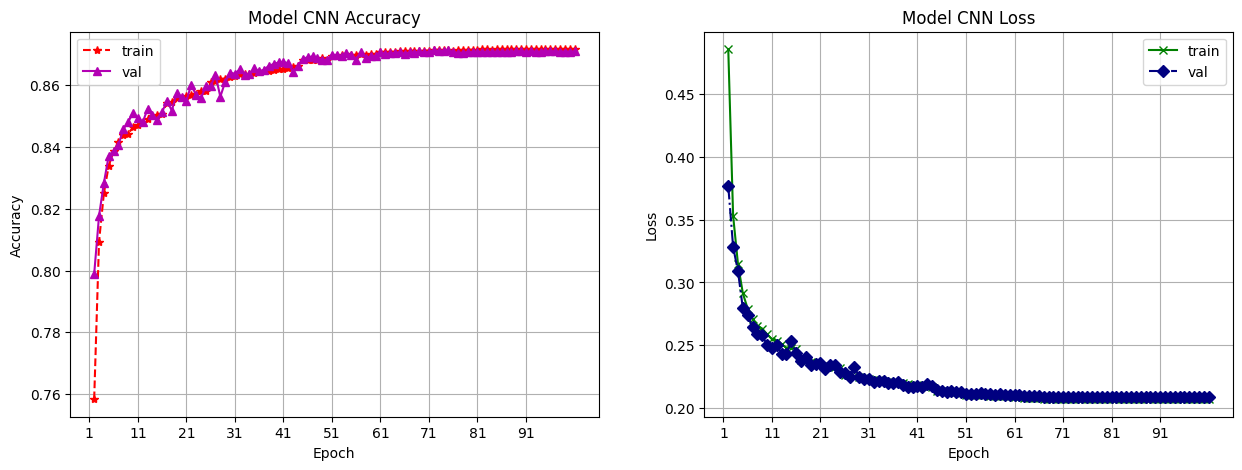

In [31]:

plot_model_history(history)
with open('./History_'+modelName, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

17539/17539 [==============================] - 26s 1ms/step


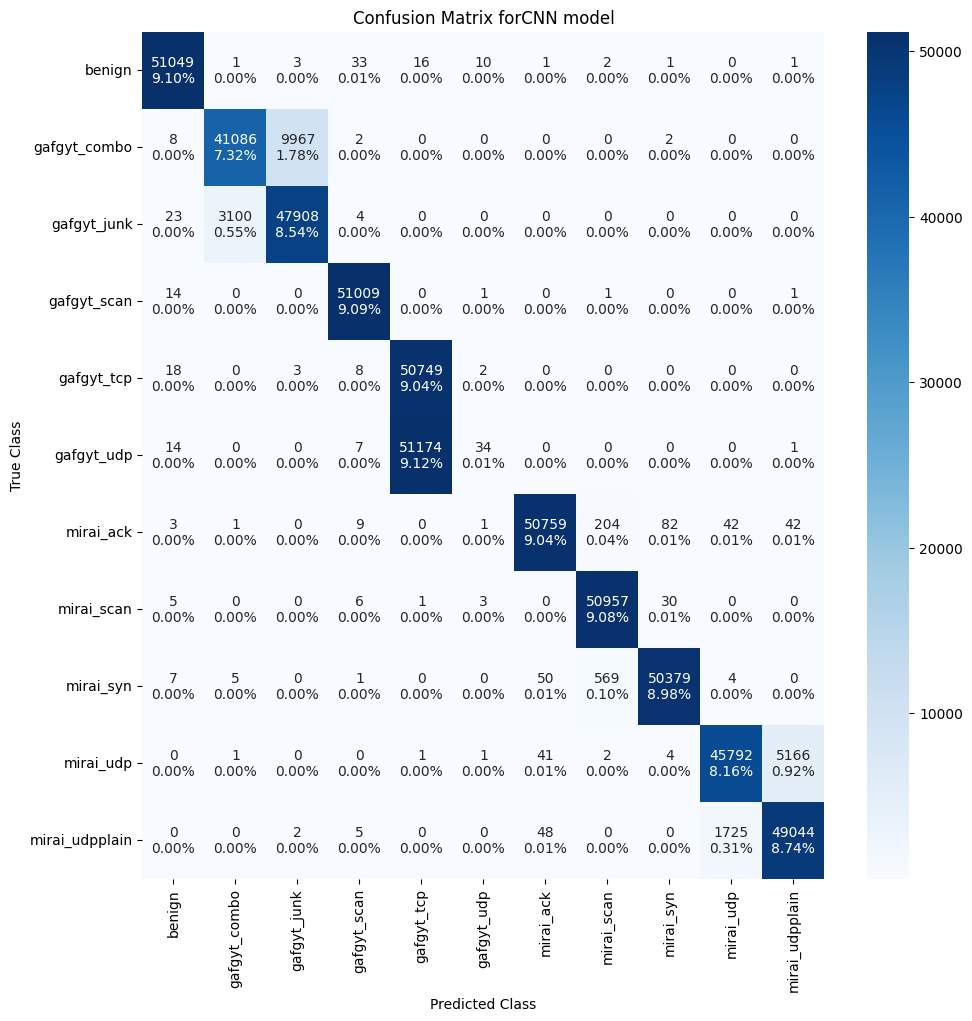

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = model.predict(X_test_cnn)

y_pred_cm  = np.argmax(y_pred, axis =1)
y_test_cm  = np.argmax(y_test, axis = 1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(11,11)

label = ['benign','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp'\
        ,'mirai_ack','mirai_scan','mirai_syn','mirai_udp','mirai_udpplain']

plt.figure(figsize=(11,11))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix for'+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.savefig('./'+modelName+'_CM.png')
plt.show()

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp'\
        ,'mirai_ack','mirai_scan','mirai_syn','mirai_udp','mirai_udpplain']))

loss, accuracy = model.evaluate(X_test_cnn, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

with open('./'+modelName+'_CR.txt','a') as f:
    f.write(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_tcp','gafgyt_udp'\
        ,'mirai_ack','mirai_scan','mirai_syn','mirai_udp','mirai_udpplain']))
    f.write("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     51117
  gafgyt_combo       0.93      0.80      0.86     51065
   gafgyt_junk       0.83      0.94      0.88     51035
   gafgyt_scan       1.00      1.00      1.00     51026
    gafgyt_tcp       0.50      1.00      0.66     50780
    gafgyt_udp       0.65      0.00      0.00     51230
     mirai_ack       1.00      0.99      0.99     51143
    mirai_scan       0.98      1.00      0.99     51002
     mirai_syn       1.00      0.99      0.99     51015
     mirai_udp       0.96      0.90      0.93     51008
mirai_udpplain       0.90      0.96      0.93     50824

      accuracy                           0.87    561245
     macro avg       0.89      0.87      0.84    561245
  weighted avg       0.89      0.87      0.84    561245

17539/17539 [==============================] - 37s 2ms/step - loss: 0.2083 - accuracy: 0.8709
Test: accuracy = 0.870860  ;  loss = 0.208274


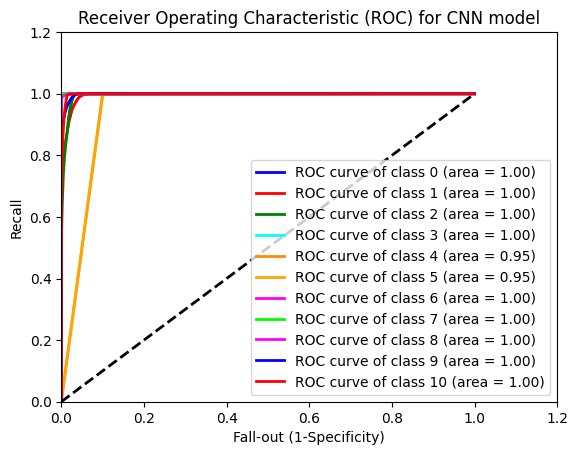

In [34]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(labels.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','aqua', 'darkorange', 'orange','fuchsia', 'lime','magenta'])
for i, color in zip(range(labels.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0,1.2])
plt.ylim([0.0,1.2])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.title('Receiver Operating Characteristic (ROC) for '+modelName+' model')
plt.legend(loc="lower right")
plt.savefig('./'+modelName+'_ROC.png')

plt.show()

In [35]:
from sklearn.metrics import precision_score
macro_score_rf = precision_score(y_test_cm,y_pred_cm,average='macro')
micro_score_rf = precision_score(y_test_cm,y_pred_cm,average='micro')
weighted_score_rf = precision_score(y_test_cm,y_pred_cm,average='weighted')

#precision scores
print(macro_score_rf)
print(micro_score_rf)
print(weighted_score_rf)

0.8865748189863747
0.8708603194683249
0.8866887584039925


In [36]:
from sklearn.metrics import recall_score
macro_score_rf = recall_score(y_test_cm,y_pred_cm,average='macro')
micro_score_rf = recall_score(y_test_cm,y_pred_cm,average='micro')
weighted_score_rf = recall_score(y_test_cm,y_pred_cm,average='weighted')

#precision scores
print(macro_score_rf)
print(micro_score_rf)
print(weighted_score_rf)

0.8712328708073849
0.8708603194683249
0.8708603194683249


In [37]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(y_test_cm,y_pred_cm)

0.857604799954144